# **LAB 2 - PART 2 Gradient Descent**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

### **Read file, Explore Data, Data Cleansing**

In [2]:
### START CODE HERE ###
df = pd.read_csv("./Gradient-Descent-example-data.csv")
### END CODE HERE ###
df.describe()

,No,Gold Price Increment,Bitcoin Increment
count,9.000000,9.000000,9.000000
mean,5.000000,0.444444,1088.555556
std,2.738613,3.126944,521.563062
min,1.000000,-4.000000,424.000000
25%,3.000000,-2.000000,663.000000
50%,5.000000,1.000000,1012.000000
75%,7.000000,2.000000,1560.000000
max,9.000000,5.000000,1882.000000


### **Create a `Bitcoin Increment_standardize` columns**

In [3]:
### START CODE HERE ###
standardize_scaler = StandardScaler()
df["Bitcoin Increment_standardize"] = standardize_scaler.fit_transform(df[['Bitcoin Increment']])
### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize
0,1,-1,846,-0.493265
1,2,-4,424,-1.351452
2,3,2,1560,0.958738
3,4,-3,523,-1.150124
4,5,1,1012,-0.155685
5,6,-2,663,-0.865418
6,7,4,1624,1.088890
7,8,5,1882,1.613563
8,9,2,1263,0.354753


### **Gradient Descent**

$$
h_{\theta} = \theta_1x + \theta_0 
\\
J(\theta) = (y-h{(x)})^2
\\
\theta_{j} \leftarrow \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$
Demonstrate a single step of Gradient Descent. Then plot the graph that shows the model before and after the update parameters

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 = 0.4, \theta_1 = 0.8, learning\ rate = 0.01$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

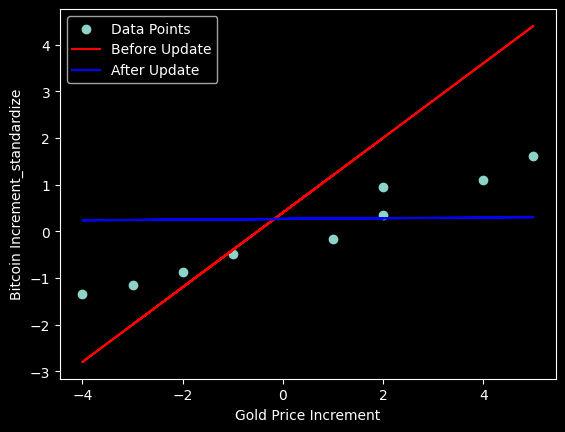

</details>

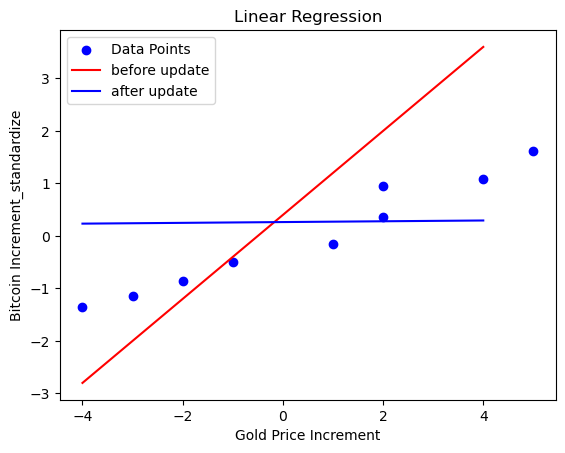

In [4]:
### START CODE HERE ###
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

h_before = theta_1*x + theta_0
grad_J_theta_1 =  -2* (y - h_before) * x        # Come from partial derivertive
grad_J_theta_0 =  -2* (y- h_before)
theta_1 = theta_1-alpha*np.sum(grad_J_theta_1)
theta_0 = theta_0-alpha*np.sum(grad_J_theta_0)
h_after = theta_1*x + theta_0

### END CODE HERE ###

plt.scatter(x, y, color='blue', label='Data Points')
# plot line
line_x = np.linspace(-4,4,8)
plt.plot(line_x,line_x*0.8 + 0.4, color = 'r',label="before update")
plt.plot(line_x , line_x*theta_1 + theta_0, color = 'blue',label="after update")
plt.xlabel('Gold Price Increment')
plt.ylabel('Bitcoin Increment_standardize')
plt.title('Linear Regression')
plt.legend()
plt.show()

Now let's create N iterations of gradient descent, <span style='color: orange;'>***print all parameters and loss every iteration***</span> then <span style='color: orange;'>***plot the loss history***</span> and <span style='color: orange;'>***save the animation to show the change of model in each iteration to .gif***</span>.

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 \in [0,1], \theta_1 \in [0,1], learning\ rate = alpha$


In [5]:
# Assuming df is already defined
y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01
n = 50

def gradient_descent():
    global theta_0, theta_1
    h_before = theta_1*x + theta_0
    grad_J_theta_1 =  -2* (y - h_before) * x        # Come from partial derivertive
    grad_J_theta_0 =  -2* (y- h_before)
    theta_1 = theta_1-alpha*np.sum(grad_J_theta_1)
    theta_0 = theta_0-alpha*np.sum(grad_J_theta_0)

def update(i):
    plt.cla()
    plt.scatter(x, y, color='blue', label='Data Points')
    line_x = np.linspace(-4, 4, 8)
    plt.plot(line_x, line_x * theta_1 + theta_0, color='blue', label="after update")
    plt.xlabel('Gold Price Increment')
    plt.ylabel('Bitcoin Increment_standardize')
    plt.title('Linear Regression (Iteration: ' + str(i) + ')')
    plt.legend()
    gradient_descent()


### Show Figure of scatter plot of data and regression model (Red line) at each iteration
Try figure animation using FuncAnimation()**

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![SegmentLocal](parameter_update_animation.gif "segment")

</details>

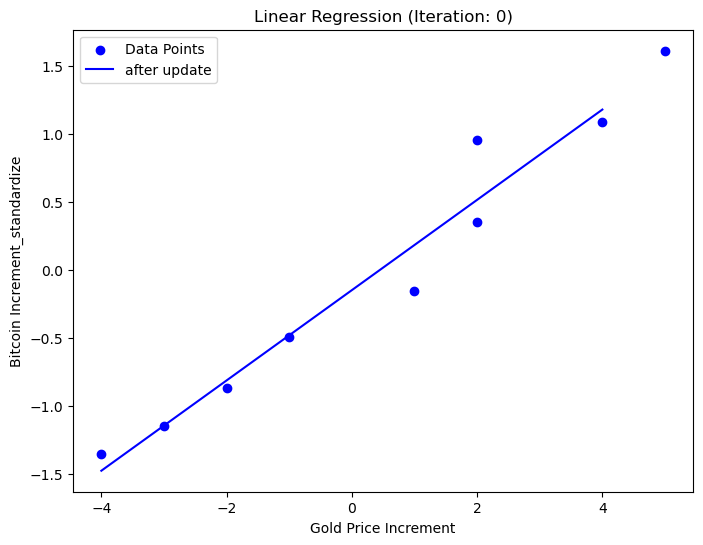

In [6]:
### START CODE HERE ###
fig, ax = plt.subplots(figsize=(8, 6))
ani = FuncAnimation(fig, update, frames=n, repeat=False)

ani.save('linear_plot_animation.gif', writer='pillow', fps=5)
### END CODE HERE ###

### Create the `Predicted_standardize` columns from the best parameters set

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize |
|----------------------|-------------------|-------------------------------|------------------------|
| -1                | 846                           | -0.493265              | -0.169845              |
| -4                | 424                           | -1.351452              | -1.063912              |
| 2                 | 1560                          | 0.958738               | 0.724223               |
| -3                | 523                           | -1.150124              | -0.765890              |



</details>

In [7]:
### START CODE HERE ###

df["Predicted_standardize"] = theta_1*x + theta_0

### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize
0,1,-1,846,-0.493265,-0.479627
1,2,-4,424,-1.351452,-1.475822
2,3,2,1560,0.958738,0.516568
3,4,-3,523,-1.150124,-1.143757
4,5,1,1012,-0.155685,0.184503
5,6,-2,663,-0.865418,-0.811692
6,7,4,1624,1.088890,1.180697
7,8,5,1882,1.613563,1.512762
8,9,2,1263,0.354753,0.516568


Create the `Predicted` that inverse standardize of `Predicted_standardize`


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize | Predicted       |
|----------------------|-------------------|-------------------------------|------------------------|-----------------|
| -1                | 846                           | -0.493265              | -0.239102	   | 970.981043| 1005.037081     |
| -4                | 424                           | -1.351452              | -1.148680	   | 523.710247     |
| 2                 | 1560                          | 0.958738               | 0.670476	       | 1418.251840     |
| -3                | 523                           | -1.150124              | -0.845487	   | 672.800513     |



</details>

In [8]:
### START CODE HERE ###

df["Predicted"] = standardize_scaler.inverse_transform(df[["Predicted_standardize"]])

### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize,Predicted
0,1,-1,846,-0.493265,-0.479627,852.706430
1,2,-4,424,-1.351452,-1.475822,362.843260
2,3,2,1560,0.958738,0.516568,1342.569600
3,4,-3,523,-1.150124,-1.143757,526.130983
4,5,1,1012,-0.155685,0.184503,1179.281877
5,6,-2,663,-0.865418,-0.811692,689.418707
6,7,4,1624,1.088890,1.180697,1669.145047
7,8,5,1882,1.613563,1.512762,1832.432770
8,9,2,1263,0.354753,0.516568,1342.569600


## Question
1. What would be the iteration that gives the best parameters?
2. What are the best regression model parameters?
3. Show regression model equation of best parameters compared to the regression model equation from the last iteration (#30) 

1. '>= 30 iterations

In [9]:
# 2. last parameters
print(theta_1,theta_0)

0.3320648973553697 -0.14756219309421473


3. equation parameters is very similar